## Importing Libraries ||

In [ ]:
# Importing the  required libraries

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import missingno as msno
import seaborn as sns
import warnings
from google.colab import drive
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier



## Reading Data ||

In [ ]:
drive.mount('/content/drive')
# Load dataset

Df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
Df_test = pd.read_csv("/content/drive/MyDrive/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/sample_submission.csv")

Df_train.head()

Mounted at /content/drive


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
Df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
Df_train.shape

(8693, 14)

In [ ]:
Df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
Df_test.shape

(4277, 13)

In [ ]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
submission.shape

(4277, 2)

In [ ]:
Df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
Df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [ ]:
# creating a function to get unique values of each column.

for col in Df_train.columns:
    unique_values = pd.unique(Df_train[col])
    print(f"{col}:{unique_values}")

PassengerId:['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet:['Europa' 'Earth' 'Mars' nan]
CryoSleep:[False True nan]
Cabin:['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination:['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age:[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP:[False True nan]
RoomService:[   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt:[   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall:[   0.   25.  371. ... 1085.  510. 1872.]
Spa:[   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck:[   0.   44.   49. ... 1164.  971. 3235.]
Name:['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

## Performing EDA ||

<Axes: >

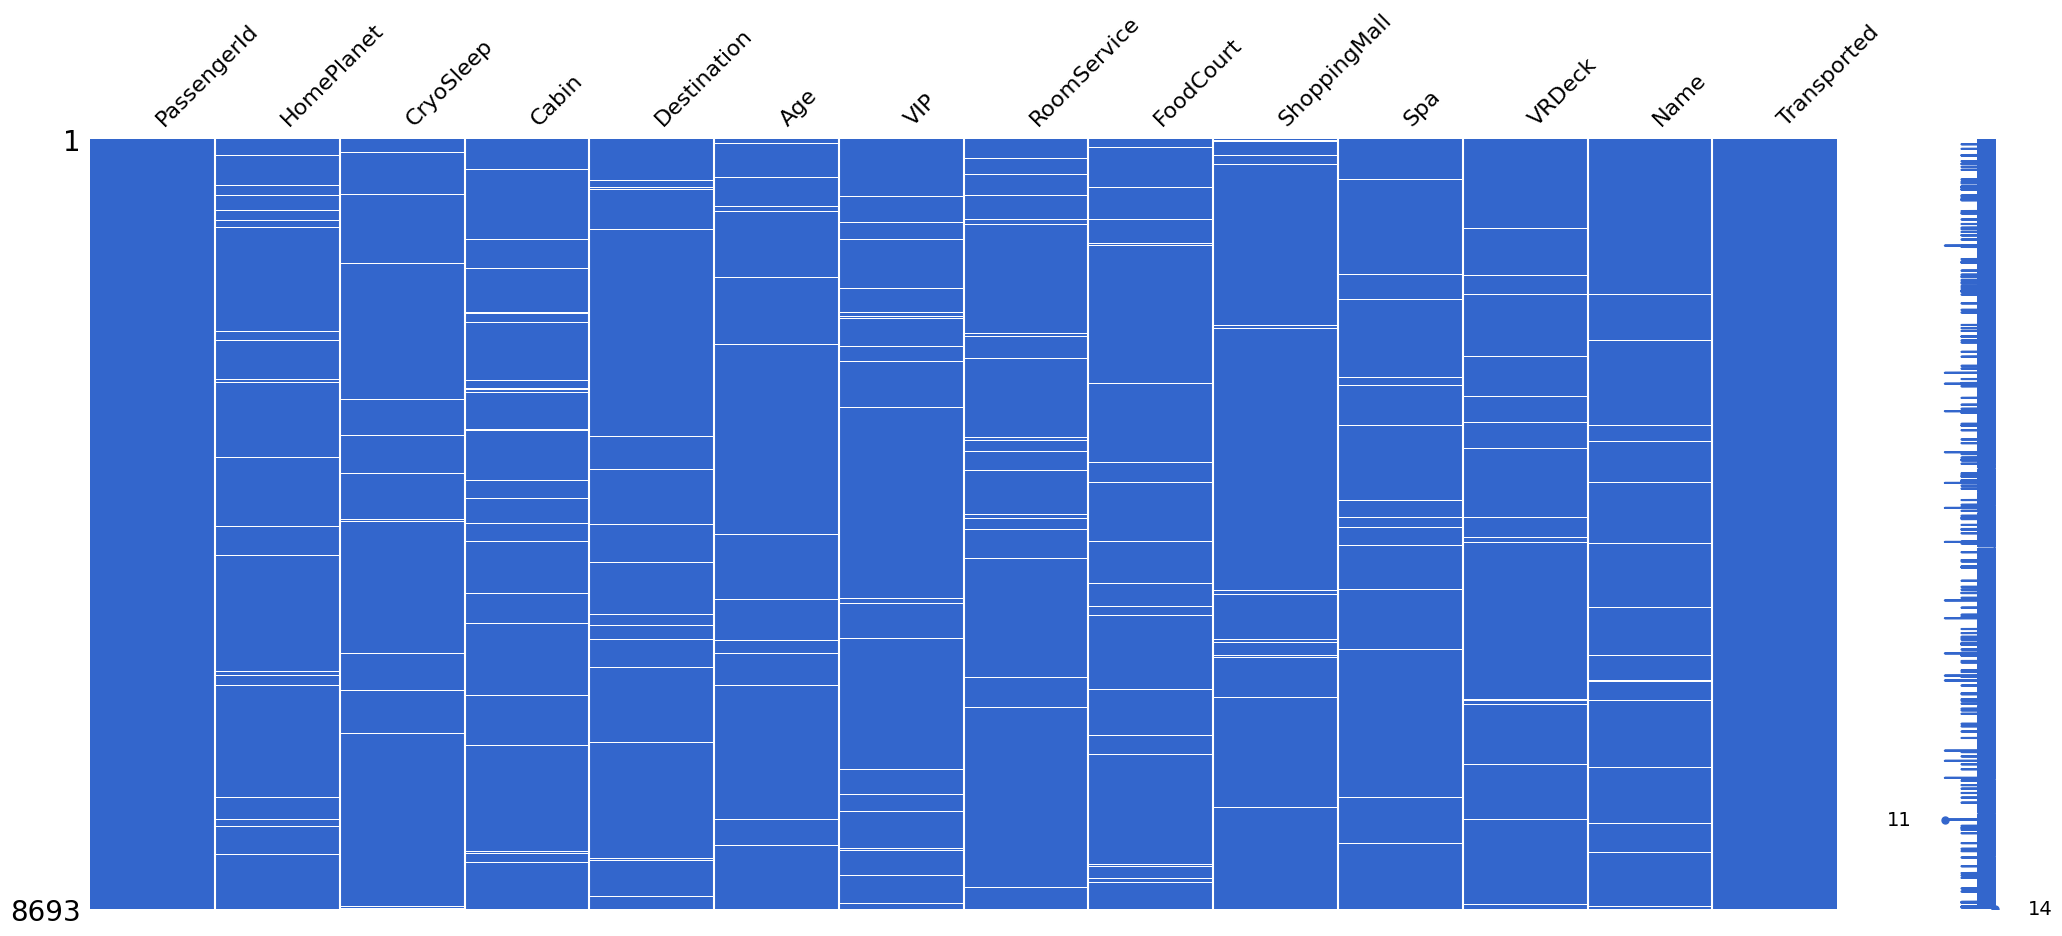

In [ ]:
# Checking for missing_values

msno.matrix(Df_train, color=(0.2, 0.4, 0.8))


In [ ]:
# Drawing pie chart

colors = ["#ff6347", "#ffa07a", "#ffdab9", "#ffffe0", "#e6e6fa", "#b0e0e6", "#87cefa"]

px.pie(Df_train, names='HomePlanet', title = "planet of Passengers",color_discrete_sequence=colors)

>> 

In [ ]:
# Drawing pie chart 

px.pie(Df_train, names='Transported', title = "Planet of Passengers",color_discrete_sequence=colors)

In [ ]:
avg_age = Df_train.groupby("HomePlanet")["Age"].median()
avg_age


HomePlanet
Earth     23.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64

In [ ]:
# plotting histogram

px.histogram(Df_train, x = "Age", color="HomePlanet", marginal="box",color_discrete_sequence=colors)

In [ ]:
# Plotting histogram

px.histogram(Df_train, color = "Transported", x="HomePlanet",color_discrete_sequence=colors)

In [ ]:
# Plotting bar chart
fig = go.Figure(data=[
    go.Bar(name="Earth", x=Df_train[Df_train['HomePlanet']=='Earth']['Transported'].value_counts().index, y=Df_train[Df_train['HomePlanet']=='Earth']['Transported'].value_counts(), marker=dict(color="#ff6347")),
    go.Bar(name="Mars", x=Df_train[Df_train['HomePlanet']=='Mars']['Transported'].value_counts().index, y=Df_train[Df_train['HomePlanet']=='Mars']['Transported'].value_counts(), marker=dict(color="#ffa07a")),
    go.Bar(name="Europa", x=Df_train[Df_train['HomePlanet']=='Europa']['Transported'].value_counts().index, y=Df_train[Df_train['HomePlanet']=='Europa']['Transported'].value_counts(), marker=dict(color="#ffdab9"))
])

fig.update_layout(barmode='group')
fig.show()


In [ ]:
# Define custom color scale
custom_color_scale = [(0, '#ffffff'), (0.5, '#ff7f0e'), (1, '#2ca02c')]  # RGB tuples

# Create plot with custom color scale
fig = px.imshow(Df_train.corr(), text_auto=True, aspect="auto", color_continuous_scale=custom_color_scale)

# Show plot
fig.show()

In [ ]:
# Importing plotly express
import plotly.express as px

# Plotting histogram
fig = px.histogram(Df_train[Df_train["VIP"]==True], x="HomePlanet", color="HomePlanet",
                   title="Distribution of Home Planets for VIPs", 
                   labels={'HomePlanet': 'Home Planet', 'count': 'Number of VIPs'})
fig.show()


In [ ]:
# Plotting histogram

px.histogram(Df_train, x="Destination", color="Transported", title="Destination with HomePlanet",color_discrete_sequence=colors)

In [ ]:
# plotting histogram

px.histogram(Df_train, x="CryoSleep", color="Transported", title="Cryosleep with HomePlanet",color_discrete_sequence=colors)

In [ ]:
# plotting 3d scatter

px.scatter_3d(Df_train, x="Age", y="HomePlanet", z="Transported", color="Transported", symbol="VIP")


# Data processing 

In [ ]:
Df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# dropping useless columns

Df_train.drop(['PassengerId','Name'],axis =1 ,inplace=True)
Df_test.drop(['PassengerId','Name'],axis =1 ,inplace=True) 


In [ ]:
# splitting the column 'cabin' into deck,num and side

Df_train[['deck','num','side']] = Df_train['Cabin'].str.split('/', expand= True)
Df_test[['deck','num','side']] = Df_test['Cabin'].str.split('/', expand= True)

Df_train.drop(['Cabin','num'],axis =1 ,inplace=True)
Df_test.drop(['Cabin','num'],axis =1 ,inplace=True)

In [ ]:
# performing feature engineering

Df_train["TotalSpent"]= Df_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
Df_test["TotalSpent"]= Df_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)



In [ ]:
# checking for null values

Df_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck            199
side            199
TotalSpent        0
dtype: int64

In [ ]:
# filling 'x' value on null places in 'HomePlanet' column

Df_train['HomePlanet'].fillna("x", inplace=True)
Df_test["HomePlanet"].fillna("x", inplace=True)

In [ ]:
# using imputer to fill the null values in several column simultaneously by mode

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imputer = SimpleImputer(strategy="most_frequent")

imputer.fit_transform(Df_train[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]])
Df_train[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]]= imputer.transform(Df_train[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]])

imputer.fit_transform(Df_test[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]])
Df_test[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]]= imputer.transform(Df_test[["HomePlanet","CryoSleep",'Destination',"VIP","deck","side"]])

In [ ]:
Df_train.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck              0
side              0
TotalSpent        0
dtype: int64

In [ ]:
# Filling the null values in column 'Age' with median w.r.t 'HomePlanet'

Df_train["Age"] = Df_train.groupby("HomePlanet")["Age"].transform(lambda x: x.fillna(x.median()))
Df_test["Age"] = Df_train.groupby("HomePlanet")["Age"].transform(lambda x: x.fillna(x.median()))

In [ ]:
Df_train.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck              0
side              0
TotalSpent        0
dtype: int64

In [ ]:
# filling the rest null values with '0'

Df_train.fillna(0, inplace=True)
Df_test.fillna(0, inplace=True)

In [ ]:
Df_train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
side            0
TotalSpent      0
dtype: int64

In [ ]:
# one hot encoding

one_hot_train = pd.get_dummies(Df_train, columns=["HomePlanet","CryoSleep","Destination","VIP","deck","side"], drop_first=True)
hot_test = pd.get_dummies(Df_test, columns=["HomePlanet","CryoSleep","Destination","VIP","deck","side"], drop_first=True)

one_hot_train["Transported"].replace({True:1,False:0}, inplace=True)

In [ ]:
one_hot_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalSpent,HomePlanet_Europa,HomePlanet_Mars,...,Destination_TRAPPIST-1e,VIP_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,736.0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,1,0,...,1,1,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1091.0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,8536.0,1,0,...,0,1,0,0,0,0,0,0,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,1873.0,0,0,...,1,0,0,0,0,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,4637.0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
one_hot_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   int64  
 7   TotalSpent                 8693 non-null   float64
 8   HomePlanet_Europa          8693 non-null   uint8  
 9   HomePlanet_Mars            8693 non-null   uint8  
 10  HomePlanet_x               8693 non-null   uint8  
 11  CryoSleep_True             8693 non-null   uint8  
 12  Destination_PSO J318.5-22  8693 non-null   uint8  
 13  Destination_TRAPPIST-1e    8693 non-null   uint8

# Data Modelling

In [ ]:
# dropping the column 'Transported' and storing it in another variable.

x = one_hot_train.drop('Transported',axis=1)
y = one_hot_train['Transported']

In [ ]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30,random_state=47)

In [ ]:
# creating machine learning Logistic Regression model named 'log'
log = LogisticRegression()
# fitting data in our model
log.fit(x_train,y_train)
log.score(x_test,y_test)
pred = log.predict(x_test)

# CLASSIFICATION REPORT

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1291
           1       0.80      0.81      0.80      1317

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [ ]:
# function for hyperparameter tuning

def hyperparameter_tuning(model, param_grid, x_train, y_train, x_test, y_test):
    # using GridSearchCV
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
    grid.fit(x_train, y_train)
    print("Best Parameters:", grid.best_params_)
    print("Best Score:", grid.best_score_)
    print("Train Score:", grid.score(x_train, y_train))
    print("Test Score:", grid.score(x_test, y_test))
    return grid.best_params_

In [ ]:
# DecisionTreeClassifier

grid_parameters = {'max_depth':[3,4,5]}
b_parameters = hyperparameter_tuning(DecisionTreeClassifier(), grid_parameters, x_train, y_train, x_test, y_test)

Best Parameters: {'max_depth': 5}
Best Score: 0.7768282662284305
Train Score: 0.7876746096959737
Test Score: 0.786042944785276


In [ ]:
# RandomForestClassifier
grid_parameters = {'n_estimators':[100,200,300], "max_depth": [3,4,5]}
b_parameters = hyperparameter_tuning(RandomForestClassifier(),grid_parameters, x_train, y_train, x_test, y_test )

Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Score: 0.7625308134757601
Train Score: 0.7641741988496302
Test Score: 0.7710889570552147


In [ ]:
# GradientBoostingClassifier
grid_parameters = {'n_estimators':[100,200,300], "max_depth": [3,4,5]}
b_parameters = hyperparameter_tuning(GradientBoostingClassifier(),grid_parameters, x_train, y_train, x_test, y_test )


Best Parameters: {'max_depth': 4, 'n_estimators': 100}
Best Score: 0.8024650780608054
Train Score: 0.8345110928512737
Test Score: 0.808282208588957


In [ ]:
# XGBClassifier
grid_parameters = {'n_estimators':[100,200,300], "max_depth": [3,4,5]}
b_parameters = hyperparameter_tuning(XGBClassifier(),grid_parameters, x_train, y_train, x_test, y_test)


Best Parameters: {'max_depth': 4, 'n_estimators': 100}
Best Score: 0.8009860312243221
Train Score: 0.8596548890714872
Test Score: 0.8021472392638037


In [ ]:
# LGBMClassifier
grid_parameters = {'n_estimators':[100,200,300], "max_depth": [3,4,5]}
b_parameters = hyperparameter_tuning(LGBMClassifier(),grid_parameters, x_train, y_train, x_test, y_test )
model = LGBMClassifier(n_estimators=100, max_depth=4)
model.fit(x_train, y_train)
pred = model.predict(hot_test)

Best Parameters: {'max_depth': 4, 'n_estimators': 100}
Best Score: 0.8024650780608052
Train Score: 0.8225143796220213
Test Score: 0.8105828220858896


In [ ]:
# using Voting Classifier for Ensembling


gb = GradientBoostingClassifier(max_depth=3, n_estimators=200)
xgb = XGBClassifier(max_depth=4,n_estimators=100)
lgb = LGBMClassifier(max_depth=4,n_estimators=100)
cb = CatBoostClassifier(max_depth=3, n_estimators=100)

clf = VotingClassifier(estimators=[('gb',gb),("xgb",xgb),("cb",cb),("lgb",lgb)], voting="soft")

clf.fit(x_train, y_train)

                                             


Learning rate set to 0.183998
0:	learn: 0.6424096	total: 48.9ms	remaining: 4.84s
1:	learn: 0.6077098	total: 52.9ms	remaining: 2.59s
2:	learn: 0.5742928	total: 54.9ms	remaining: 1.77s
3:	learn: 0.5557592	total: 57.3ms	remaining: 1.37s
4:	learn: 0.5406282	total: 59.3ms	remaining: 1.13s
5:	learn: 0.5280923	total: 61.6ms	remaining: 965ms
6:	learn: 0.5200552	total: 63.7ms	remaining: 846ms
7:	learn: 0.5074732	total: 65.7ms	remaining: 755ms
8:	learn: 0.4996593	total: 67.7ms	remaining: 684ms
9:	learn: 0.4948992	total: 69.6ms	remaining: 626ms
10:	learn: 0.4895391	total: 71.9ms	remaining: 582ms
11:	learn: 0.4853644	total: 74ms	remaining: 542ms
12:	learn: 0.4805940	total: 76.2ms	remaining: 510ms
13:	learn: 0.4774937	total: 78.4ms	remaining: 482ms
14:	learn: 0.4735601	total: 80.7ms	remaining: 457ms
15:	learn: 0.4710915	total: 82.9ms	remaining: 435ms
16:	learn: 0.4687472	total: 85.1ms	remaining: 416ms
17:	learn: 0.4655607	total: 87.2ms	remaining: 397ms
18:	learn: 0.4627191	total: 89.5ms	remaining: 

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(n_estimators=200)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importanc...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x7f362d83f4c0>),
                             ('lgb', LGBMClassifier(max_depth=4))],
                 voting='soft')

In [ ]:
y_pred = clf.predict(x_test)
pred = clf.predict(hot_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1291
           1       0.80      0.82      0.81      1317

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



In [ ]:
submission['Transported'] = pred
submission['Transported'].replace({1:True,0:False}, inplace=True)
submission.to_csv("submission.csv", index=False)
submission.head(10)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True
